# Assignment 2(due on 11/08)

## Student:蒙芳秀（12331305），Gtihub：mengfangxiu
## 批改人：吴昊天
## 得分：44/50

### PS1. Significant earthquakes since 2150 B.C.

In [1]:
#1-1
import pandas as pd
Sig_Eqs=pd.read_csv('earthquakes-2023-11-01_21-34-17_+0800.tsv',sep='\t')
#Sig_Eqs.head()
#Show dataset info
#Sig_Eqs.info()
# Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country
Sig_Eqs1 = Sig_Eqs.groupby('Country')['Total Injuries'].sum().sort_values(ascending=False)[0:10]
Sig_Eqs1

# 助教添加，应统计Total Deaths
Sig_Eqs1 = Sig_Eqs.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)[0:10]
Sig_Eqs1

Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64

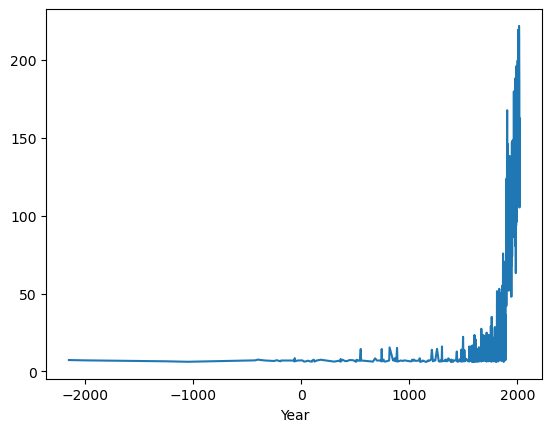

In [2]:
#1-2
# Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year
Sig_Eqs2=Sig_Eqs[Sig_Eqs['Mag']>6.0]
Sig_Eqs22 = Sig_Eqs2.groupby('Year')['Mag'].sum().plot()

(-2250.0, 2023.0)

<Figure size 640x480 with 0 Axes>

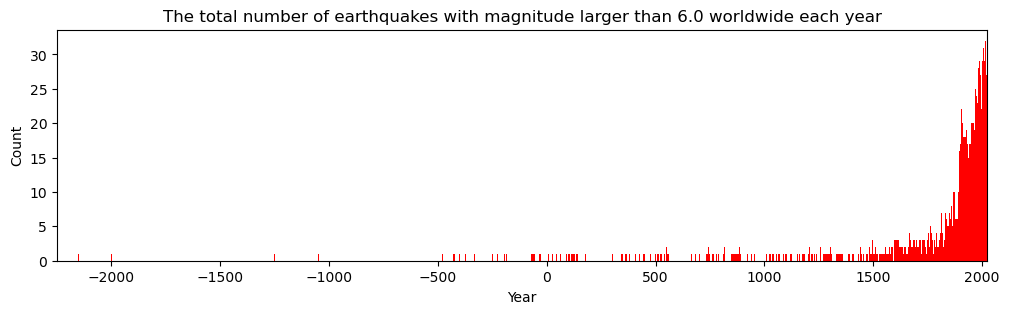

In [3]:
# 助教参考代码
import matplotlib.pyplot as plt
Sig_Eqs_2 = Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()['Mag']
plt.figure(2)
plt.figure(figsize=(12,3))
plt.bar(Sig_Eqs_2.index,Sig_Eqs_2,width=5,color='red')
plt.title(u'The total number of earthquakes with magnitude larger than 6.0 worldwide each year') #
plt.ylabel('Count') 
plt.xlabel('Year')
plt.xlim([min(Sig_Eqs_2.index)-100,max(Sig_Eqs_2.index)])

In [4]:
#1-3
#https://blog.51cto.com/u_16213327/7239823 python 循环数据框按列合并
def CountEq_LargestEq(Sig_Eqs,country):
    #the total number of earthquakes since 2150 B.C. in a given country
    total_earthquakes = len(Sig_Eqs[Sig_Eqs['Country']==country])
    #the date of the largest earthquake ever happened in this country
    Sig_Eqs3 = Sig_Eqs[Sig_Eqs['Country']==country].sort_values('Mag',ascending=False)[0:1]
    columns = ['Year', 'Mo','Dy','Hr','Mn','Sec']
    Date_largest = Sig_Eqs3.loc[:, columns]
    return total_earthquakes, Date_largest
Country=list(set(Sig_Eqs['Country'].tolist()))
results = []
result_df = pd.DataFrame()
for country in Country:
    total_earthquakes,Date_largest = CountEq_LargestEq(Sig_Eqs,country)
    results.append({'Country': country, 'Total Earthquakes': total_earthquakes, 'Largest Earthquake Date': Date_largest})
# Convert the results to a DataFrame and sort by 'Total Earthquakes' in descending order
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Total Earthquakes', ascending=0)
results_df.head(20)

,Country,Total Earthquakes,Largest Earthquake Date
54,CHINA,620,Year Mo Dy Hr Mn Sec 982 1668....
35,JAPAN,414,Year Mo Dy Hr Mn Sec 5743 ...
44,INDONESIA,411,Year Mo Dy Hr Mn Sec 5341...
129,IRAN,384,Year Mo Dy Hr Mn Sec 238 856.0...
61,TURKEY,335,Year Mo Dy Hr Mn Sec 6365 ...
106,ITALY,331,Year Mo Dy Hr Mn Sec 2842 ...
145,USA,276,Year Mo Dy Hr Mn Sec 3957 ...
22,GREECE,270,Year Mo Dy Hr Mn Sec 443 1303.0...
1,PHILIPPINES,224,Year Mo Dy Hr Mn Sec 2475 ...
34,MEXICO,209,Year Mo Dy Hr Mn Sec 2496 ...


In [5]:
#1-3
#https://blog.51cto.com/u_16213327/7239823 python 循环数据框按列合并
def CountEq_LargestEq(Sig_Eqs,country):
    #the total number of earthquakes since 2150 B.C. in a given country
    Sig_Eqs3 = Sig_Eqs[Sig_Eqs['Country']==country]['Mag'].sum()  
    #the date of the largest earthquake ever happened in this country
    Sig_Eqs33 = Sig_Eqs[Sig_Eqs['Country']==country].sort_values('Mag',ascending=False)[0:1]
    columns = ['Year', 'Mo','Dy','Hr','Mn','Sec']
    Sig_Eqs33set = Sig_Eqs33.loc[:, columns]
    Sig_Eqs33set['Total Mag']=Sig_Eqs3
    return Sig_Eqs33set
#CountEq_LargestEq(Sig_Eqs,'CHINA')
Country=list(set(Sig_Eqs['Country'].tolist()))
result_df = pd.DataFrame()
for country in Country:
    CountEq_LargestEq1=CountEq_LargestEq(Sig_Eqs,country)
    columns = CountEq_LargestEq1.columns
    result_df = pd.concat([result_df, CountEq_LargestEq1[columns]], axis=0) #按列合并
result_df.sort_values('Total Mag',ascending=False)

,Year,Mo,Dy,Hr,Mn,Sec,Total Mag
982,1668.0,7.0,25.0,NaN,NaN,NaN,3532.6
5743,2011.0,3.0,11.0,5.0,46.0,24.1,2447.2
5341,2004.0,12.0,26.0,0.0,58.0,53.4,2217.1
238,856.0,12.0,22.0,NaN,NaN,NaN,1524.3
3957,1964.0,3.0,28.0,3.0,36.0,0.0,1458.1
...,...,...,...,...,...,...,...
1469,1800.0,NaN,NaN,NaN,NaN,NaN,0.0
1592,1822.0,12.0,1.0,NaN,NaN,0.0,0.0
588,1490.0,NaN,NaN,NaN,NaN,NaN,0.0
2273,1882.0,1.0,NaN,NaN,NaN,NaN,0.0


### 代码结果正确，功能满足要求，分析内容合理。
### 1.1中，应统计Total Deaths。助教已修改代码。
### 1.2中，注意在绘制6级以上的地震次数图件时，横坐标年份并不是均匀的，如果抽选横坐标刻度绘制，容易有歧义。助教提供给您提供了绘图的参考代码，给您参考。
### 1.3中，函数CountEq_LargestEq()要求统计总地震次数，而不是地震级的累计值。
### 并且函数CountEq_LargestEq()需要输出the total number 和 the largest earthquake ever happened in this country。需要降序排列总地震次数。
### 助教已修改代码，一起交流学习。
### 得分 21/25
### --------------------------------------------------------------------------------------------

### PS2. Wind speed in Shenzhen during the past 10 years

In [6]:
#2-1
##Wind speed in Shenzhen during the past 10 years
import pandas as pd
import numpy as np
# Read another csv
Wind_speed_data = pd.read_csv('2281305.csv')
Wind_speed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111984 entries, 0 to 111983
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   STATION            111984 non-null  int64 
 1   DATE               111984 non-null  object
 2   SOURCE             111984 non-null  int64 
 3   REPORT_TYPE        111984 non-null  object
 4   CALL_SIGN          111984 non-null  object
 5   QUALITY_CONTROL    111984 non-null  object
 6   AA1                6493 non-null    object
 7   AA2                1752 non-null    object
 8   AA3                490 non-null     object
 9   AJ1                12 non-null      object
 10  AY1                5889 non-null    object
 11  AY2                4384 non-null    object
 12  CALL_SIGN.1        111984 non-null  object
 13  CIG                111984 non-null  object
 14  DEW                111984 non-null  object
 15  ED1                423 non-null     object
 16  EQD                4

C:\Users\Wu\AppData\Local\Temp\ipykernel_22176\1890104212.py:6: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  Wind_speed_data = pd.read_csv('2281305.csv')


In [7]:
#拆分数据框
#将WND拆分
splitdata=Wind_speed_data['WND'].str.split('[,]',expand=True)
splitdata.columns=['direction angle','direction quality code','type code','speed rate','speed quality code']
Wind_speed_data1=pd.concat([Wind_speed_data,splitdata],axis=1)
Wind_speed_data1=Wind_speed_data1.drop('WND',axis=1)

In [8]:
#将DATE拆分
splitdata1=Wind_speed_data1['DATE'].str.split('[-]',expand=True)
splitdata1.columns=['year','month','hour']
Wind_speed_data2=pd.concat([Wind_speed_data1,splitdata1],axis=1)
Wind_speed_data2=Wind_speed_data2.drop('DATE',axis=1)
Wind_speed_data2['year_month'] = Wind_speed_data2['year'] + '-' + Wind_speed_data2['month']
Wind_speed_data2

,STATION,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,AY1,...,VIS,direction angle,direction quality code,type code,speed rate,speed quality code,year,month,hour,year_month
0,59493099999,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,"6,1,06,1",...,"004000,1,N,1",040,1,N,0020,1,2010,01,02T00:00:00,2010-01
1,59493099999,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,NaN,...,"002600,1,N,1",999,9,V,0010,1,2010,01,02T01:00:00,2010-01
2,59493099999,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,NaN,...,"002600,1,N,1",999,9,C,0000,1,2010,01,02T02:00:00,2010-01
3,59493099999,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,"6,1,03,1",...,"005000,1,N,1",140,1,N,0010,1,2010,01,02T03:00:00,2010-01
4,59493099999,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,NaN,...,"002100,1,N,1",300,1,N,0040,1,2010,01,02T04:00:00,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,NaN,...,"009999,1,9,9",170,1,N,0030,1,2020,09,11T17:00:00,2020-09
111980,59493099999,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,NaN,...,"009999,1,9,9",180,1,N,0040,1,2020,09,11T18:00:00,2020-09
111981,59493099999,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,NaN,...,"009999,1,9,9",220,1,V,0030,1,2020,09,11T19:00:00,2020-09
111982,59493099999,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,NaN,...,"009999,1,9,9",260,1,N,0030,1,2020,09,11T20:00:00,2020-09


In [9]:
# Data clean
#学习冯汇然同学
# 1. Drop direction angle == 999
Wind_speed_data2= Wind_speed_data2[Wind_speed_data2['direction angle'] != '999']
# 2. Drop direction quality code in [2,3,6,7]
Wind_speed_data2 = Wind_speed_data2[~Wind_speed_data2['direction quality code'].isin(['2', '3', '6', '7'])]
# 3. Drop type code == 9
Wind_speed_data2= Wind_speed_data2[Wind_speed_data2['type code'] != '9']
# 4. Drop speed rate == 9999
Wind_speed_data2 = Wind_speed_data2[Wind_speed_data2['speed rate'] != '9999']
Wind_speed_data2['speed rate'] = Wind_speed_data2['speed rate'].astype(float)
# 5. Drop speed quality code in [2,3,6,7]
Wind_speed_data2= Wind_speed_data2[~Wind_speed_data2['speed quality code'].isin(['2', '3', '6', '7'])]
# Show
Wind_speed_data2

,STATION,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,AY1,...,VIS,direction angle,direction quality code,type code,speed rate,speed quality code,year,month,hour,year_month
0,59493099999,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,"6,1,06,1",...,"004000,1,N,1",040,1,N,20.0,1,2010,01,02T00:00:00,2010-01
3,59493099999,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,"6,1,03,1",...,"005000,1,N,1",140,1,N,10.0,1,2010,01,02T03:00:00,2010-01
4,59493099999,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,NaN,...,"002100,1,N,1",300,1,N,40.0,1,2010,01,02T04:00:00,2010-01
5,59493099999,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,NaN,...,"001800,1,N,1",320,1,N,50.0,1,2010,01,02T05:00:00,2010-01
6,59493099999,4,SY-MT,ZGSZ,V020,"06,0000,2,1",NaN,NaN,NaN,"6,1,06,1",...,"003000,1,N,1",270,1,N,10.0,1,2010,01,02T06:00:00,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,NaN,...,"009999,1,9,9",170,1,N,30.0,1,2020,09,11T17:00:00,2020-09
111980,59493099999,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,NaN,...,"009999,1,9,9",180,1,N,40.0,1,2020,09,11T18:00:00,2020-09
111981,59493099999,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,NaN,...,"009999,1,9,9",220,1,V,30.0,1,2020,09,11T19:00:00,2020-09
111982,59493099999,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,NaN,...,"009999,1,9,9",260,1,N,30.0,1,2020,09,11T20:00:00,2020-09


<Axes: xlabel='year_month'>

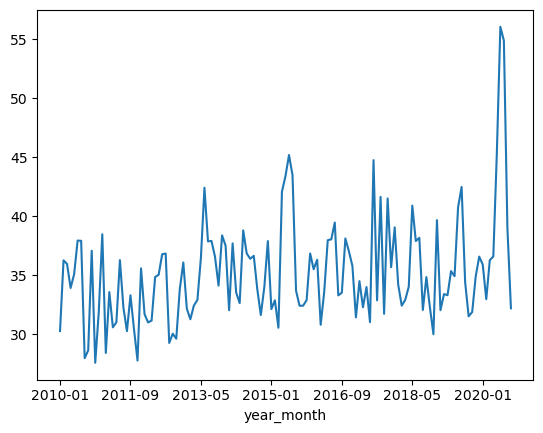

In [10]:
Wind_speed_data2.groupby('year_month')['speed rate'].mean().plot( )

### 代码运行结果正确，题目要求分析趋势。
### 得分 9/10
### ---------------------------------------------------------------------------------------------

### PS3. Explore a data set

In [11]:
#3-1
import pandas as pd
global_mean=pd.read_excel('monthly global mean of baseline data from AGAGE GC-MD data.xlsx')
#https://www.qb5200.com/article/593749.html
#3-1
# using dropna() method 删除空行
global_mean1= global_mean.dropna()
# 删除全为0的列
global_mean2 = global_mean1.loc[:, (global_mean1!= 0).any(axis=0)]
#删除有0的列
global_mean3=global_mean2.loc[:,global_mean2.all(axis=0)] #: axis=0对列操作
#删除全0的行
global_mean4=global_mean3.loc[(global_mean3!= 0).any(axis=1),:]
global_mean4

,time,month,year,CFC-11,sigama11,CFC-12,sigama12,CCl4,sigama14,N2O,sigama15
0,1978.542,7,1978,147.067,6.349,268.552,11.092,88.972,1.348,299.316,0.823
1,1978.625,8,1978,148.527,5.784,269.862,11.241,89.489,1.784,299.441,0.561
2,1978.708,9,1978,148.925,5.412,271.445,9.476,89.393,1.479,299.889,0.490
3,1978.792,10,1978,149.670,5.189,273.775,9.159,88.964,1.188,300.557,0.582
4,1978.875,11,1978,150.647,4.904,276.780,7.185,88.941,0.657,300.598,0.467
...,...,...,...,...,...,...,...,...,...,...,...
496,2019.875,11,2019,225.271,0.649,503.022,0.240,76.919,0.427,332.712,0.373
497,2019.958,12,2019,225.030,0.685,502.679,0.374,76.854,0.422,332.740,0.413
498,2020.042,1,2020,224.758,0.717,502.339,0.486,76.749,0.414,332.753,0.434
499,2020.125,2,2020,224.479,0.743,501.955,0.613,76.639,0.402,332.849,0.543


<Axes: xlabel='year'>

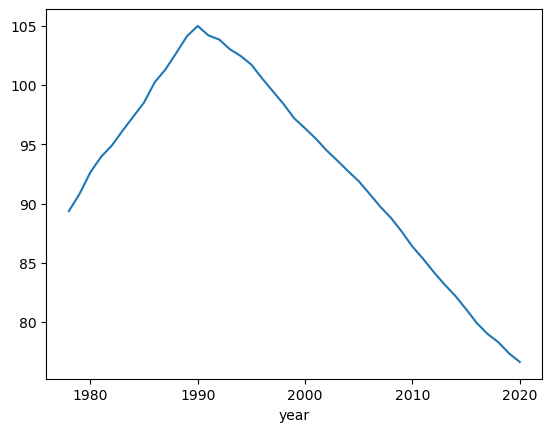

In [12]:
#3-2
global_mean4.groupby('year')['CCl4'].mean().plot()

In [13]:
#3-3
#https://www.cnpython.com/qa/1306724
global_mean5=global_mean4.groupby('year').mean()
global_mean5.sort_values(by= 'CFC-11')

,time,month,CFC-11,sigama11,CFC-12,sigama12,CCl4,sigama14,N2O,sigama15
year,,,,,,,,,,
1978,1978.750,9.5,149.573833,5.543500,273.446500,9.445500,89.364667,1.321167,300.009333,0.575167
1979,1979.500,6.5,156.145417,5.187417,289.108917,8.562333,90.826000,1.770417,300.794500,0.311500
1980,1980.500,6.5,165.689250,4.737500,306.952667,8.309833,92.631083,1.866083,301.083333,0.316417
1981,1981.500,6.5,174.205583,4.416833,321.762583,8.248750,93.942333,2.158000,301.365083,0.355167
1982,1982.500,6.5,182.177167,4.356417,338.954167,7.957083,94.889333,1.551000,303.444250,0.395083
1983,1983.500,6.5,190.881667,4.610583,355.958833,7.743667,96.141333,1.662917,303.635333,0.254917
1984,1984.500,6.5,199.263500,4.284167,372.582167,7.612167,97.334417,1.544917,304.019083,0.300083
1985,1985.500,6.5,208.019167,4.353667,390.789417,7.472167,98.520750,1.286500,304.443500,0.378833
1986,1986.500,6.5,219.007083,5.053000,410.324500,7.879250,100.234500,1.529750,305.334917,0.422917


<Axes: ylabel='year'>

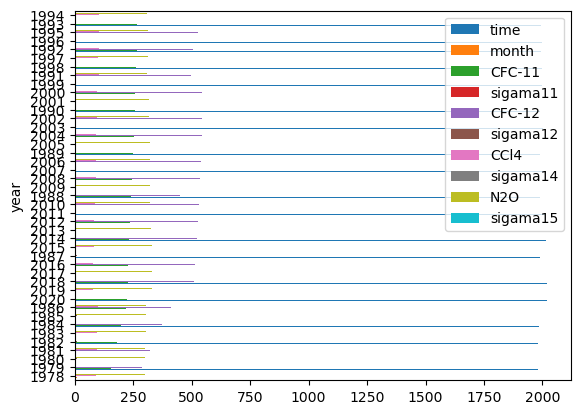

In [14]:
global_mean5.sort_values(by= 'CFC-11').plot.barh( )

<Axes: ylabel='year'>

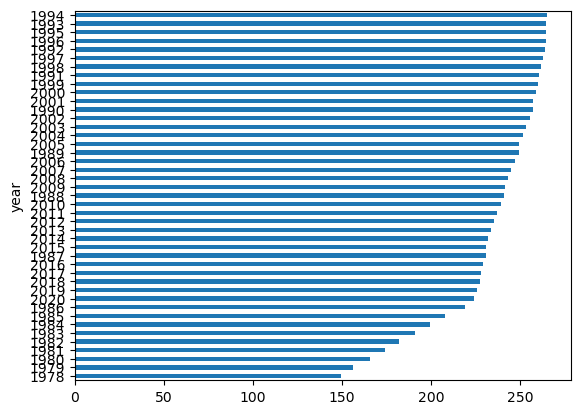

In [15]:
global_mean4.groupby('year')['CFC-11'].mean().sort_values().plot.barh( )

<Axes: ylabel='year'>

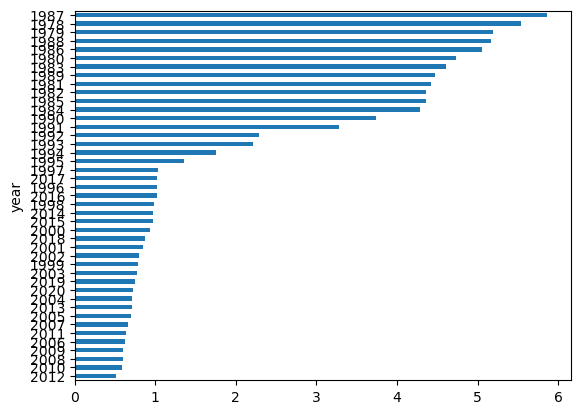

In [16]:
global_mean4.groupby('year')['sigama11'].mean().sort_values().plot.barh( )

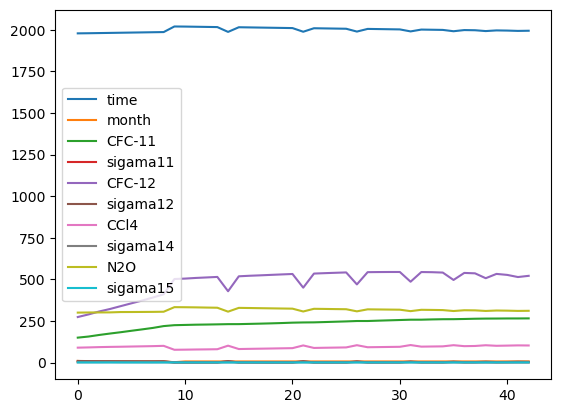

In [17]:
#https://blog.51cto.com/u_16213393/7071739
import matplotlib.pyplot as plt
global_mean6=global_mean5.sort_values(by= 'CFC-11') #对所有数据排序
columns = global_mean6.columns.tolist()  # 获取所有列的名称
data_values = [global_mean6[col].tolist() for col in columns]  # 将每一列的数据存储到列表中
for i in range(len(columns)):
    plt.plot(data_values[i], label=columns[i])  # 画出每一列的数据，并为每一列添加标签
plt.legend()  # 添加图例


In [18]:
global_mean6=global_mean5.sort_values(by= 'CFC-11')
global_mean6

,time,month,CFC-11,sigama11,CFC-12,sigama12,CCl4,sigama14,N2O,sigama15
year,,,,,,,,,,
1978,1978.750,9.5,149.573833,5.543500,273.446500,9.445500,89.364667,1.321167,300.009333,0.575167
1979,1979.500,6.5,156.145417,5.187417,289.108917,8.562333,90.826000,1.770417,300.794500,0.311500
1980,1980.500,6.5,165.689250,4.737500,306.952667,8.309833,92.631083,1.866083,301.083333,0.316417
1981,1981.500,6.5,174.205583,4.416833,321.762583,8.248750,93.942333,2.158000,301.365083,0.355167
1982,1982.500,6.5,182.177167,4.356417,338.954167,7.957083,94.889333,1.551000,303.444250,0.395083
1983,1983.500,6.5,190.881667,4.610583,355.958833,7.743667,96.141333,1.662917,303.635333,0.254917
1984,1984.500,6.5,199.263500,4.284167,372.582167,7.612167,97.334417,1.544917,304.019083,0.300083
1985,1985.500,6.5,208.019167,4.353667,390.789417,7.472167,98.520750,1.286500,304.443500,0.378833
1986,1986.500,6.5,219.007083,5.053000,410.324500,7.879250,100.234500,1.529750,305.334917,0.422917


### 代码运行结果正确，数据预处理正确，绘制图件正确，统计检查正确。题目要求“report your findings”
### 得分 14/15
### ---------------------------------------------------------------------------------------------